In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
test=pd.read_csv("/content/drive/MyDrive/NLP(Natural Language Processing)/nlp-getting-started/test.csv")
train=pd.read_csv("/content/drive/MyDrive/NLP(Natural Language Processing)/nlp-getting-started/train.csv")
ss=pd.read_csv("/content/drive/MyDrive/NLP(Natural Language Processing)/nlp-getting-started/sample_submission.csv")

In [3]:
#Merge the test train dataset into df
df=pd.concat([train,test,ss],ignore_index=True)

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0


In [5]:
df.shape

(14139, 5)

In [6]:
df.isnull().sum()

id             0
keyword     3350
location    6901
text        3263
target      3263
dtype: int64

In [7]:
df= df.dropna(subset=['keyword','location','target'])

In [8]:
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [9]:
df['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [10]:
df['keyword'].value_counts()

collision                36
whirlwind                33
armageddon               32
fatalities               32
flames                   31
                         ..
razed                    10
epicentre                 9
detonation                8
radiation%20emergency     6
inundation                5
Name: keyword, Length: 221, dtype: int64

In [11]:
df['target'].value_counts()

0.0    2884
1.0    2196
Name: target, dtype: int64

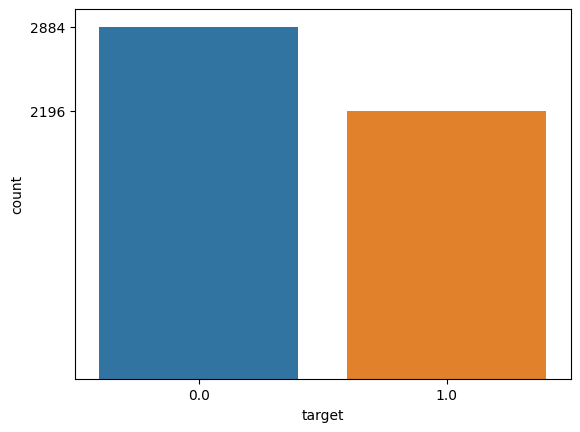

In [12]:
sns.countplot(data=df,x='target')
f=df['target'].value_counts()
plt.yticks(f)
plt.show()

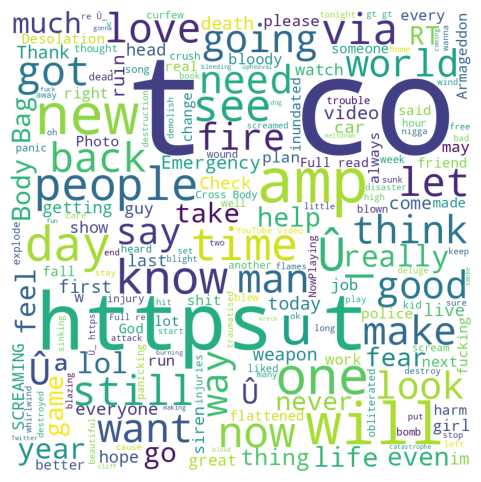

In [13]:
from wordcloud import WordCloud
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc.generate(" ".join(df[df['target']==0]['text']))
plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

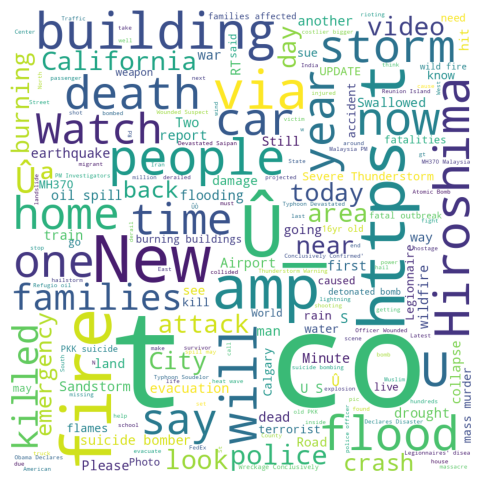

In [14]:
from wordcloud import WordCloud
wc=WordCloud(width=800,height=800,background_color='white',min_font_size=10)
wc.generate(" ".join(df[df['target']==1]['text']))
plt.figure(figsize=(6,6))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [15]:
#call library from stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
#Text Preprocessing (Text Mining)
#list of Stopwords
stop=stopwords.words('english') #stop user define object

In [17]:
#Create user define function for text preprocessing
def clean_text(msg): #clean_text() user define function
  #first convert all messsage in lower case
  msg=msg.lower()
  #setp 2: Apply tokenizer
  tokens=word_tokenize(msg)
  #Filtering only alphabets ,menns to remove digit and special
  #characters(punctuation marks) then use inbuilt method isalpha()
  word_token=[w for w in tokens if w.isalpha()]
  #Remove stop words
  #use list comprehension
  clean_token=[w for w in word_token if w not in stop]
  #Next steps f preprocessing : Lemmanization
  #create the object of WordNetLemmatizer class
  lemma=WordNetLemmatizer()
  clean_token=[lemma.lemmatize(w) for w in clean_token]
  #lemmatizer() inbuilt method of WordNetLemmatizer class
  return ' '.join(clean_token)

In [18]:
#call function
df['text']=df['text'].apply(clean_text)
df['text']

31                    bbcmtd wholesale market ablaze http
32                   always try bring heavy metal rt http
33      africanbaze breaking news nigeria flag set abl...
34                                         cry set ablaze
35              plus side look sky last night ablaze http
                              ...                        
7575                             bright side wrecked http
7577    gone relax thought wife wrecked cake goner min...
7579    three day work pretty much wrecked hahaha shou...
7580    fx forex trading cramer iger word wrecked disn...
7581    engineshed great atmosphere british lion gig t...
Name: text, Length: 5080, dtype: object

In [19]:
#select input and output
X=df['text'] #input
Y=df['target'] #output

In [20]:
#apply CountVectorizer to convert object type paragraph(Review) into number
from sklearn.feature_extraction.text import CountVectorizer
#create object of CountVectorizer class
cv=CountVectorizer()
X=cv.fit_transform(X)

In [21]:
X=X.toarray()
X.ndim

2

In [22]:
type(X)

numpy.ndarray

In [23]:
#to show features
cv.get_feature_names_out()

array(['aa', 'aaaa', 'aaaaaaallll', ..., 'åêfedex', 'åêi', 'ìü'],
      dtype=object)

In [24]:
#train test split 70-30
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [25]:
X_train.shape,X_test.shape

((3556, 10815), (1524, 10815))

In [26]:
#Classification aldorithm
from sklearn.metrics import classification_report,confusion_matrix
def create_model(model):
  model.fit(X_train,Y_train)
  Y_pred=model.predict(X_test)
  train=model.score(X_train,Y_train)
  test=model.score(X_test,Y_test)
  print(f"Training Accuracy : {train}\n\nTesting Accurary : {test}")
  #generate report
  print(classification_report(Y_test,Y_pred))
  print(confusion_matrix(Y_test,Y_pred))
  return model

In [27]:
#First applying logisticRegression
#Calling the class
from sklearn.linear_model import LogisticRegression
#Create the object
lr=LogisticRegression()
#call the object in the function
lr=create_model(lr)

Training Accuracy : 0.9656917885264342

Testing Accurary : 0.7854330708661418
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83       899
         1.0       0.77      0.68      0.72       625

    accuracy                           0.79      1524
   macro avg       0.78      0.77      0.77      1524
weighted avg       0.78      0.79      0.78      1524

[[772 127]
 [200 425]]


In [28]:
#As we know that logisticRegression does not select the features automatically
#So we are going to use DecisionTreeClassifier to select important features
#First call the class
from sklearn.tree import DecisionTreeClassifier
#create the object
dt=DecisionTreeClassifier(random_state=1) #by deafult gini index
#calling the object in the function
dt=create_model(dt)

Training Accuracy : 0.9907199100112486

Testing Accurary : 0.7178477690288714
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77       899
         1.0       0.67      0.62      0.64       625

    accuracy                           0.72      1524
   macro avg       0.71      0.70      0.70      1524
weighted avg       0.72      0.72      0.72      1524

[[707 192]
 [238 387]]
